In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('auto-mpg.csv')

In [5]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
df.loc[df['horsepower'] == '?'].value_counts().sum()

6

In [8]:
df.replace('?', np.nan, inplace=True)

In [9]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [10]:
df['horsepower'] = df['horsepower'].astype(np.float64)

In [11]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

In [12]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [13]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [14]:
df['origin'].unique()

array([1, 3, 2])

In [15]:
df['model year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

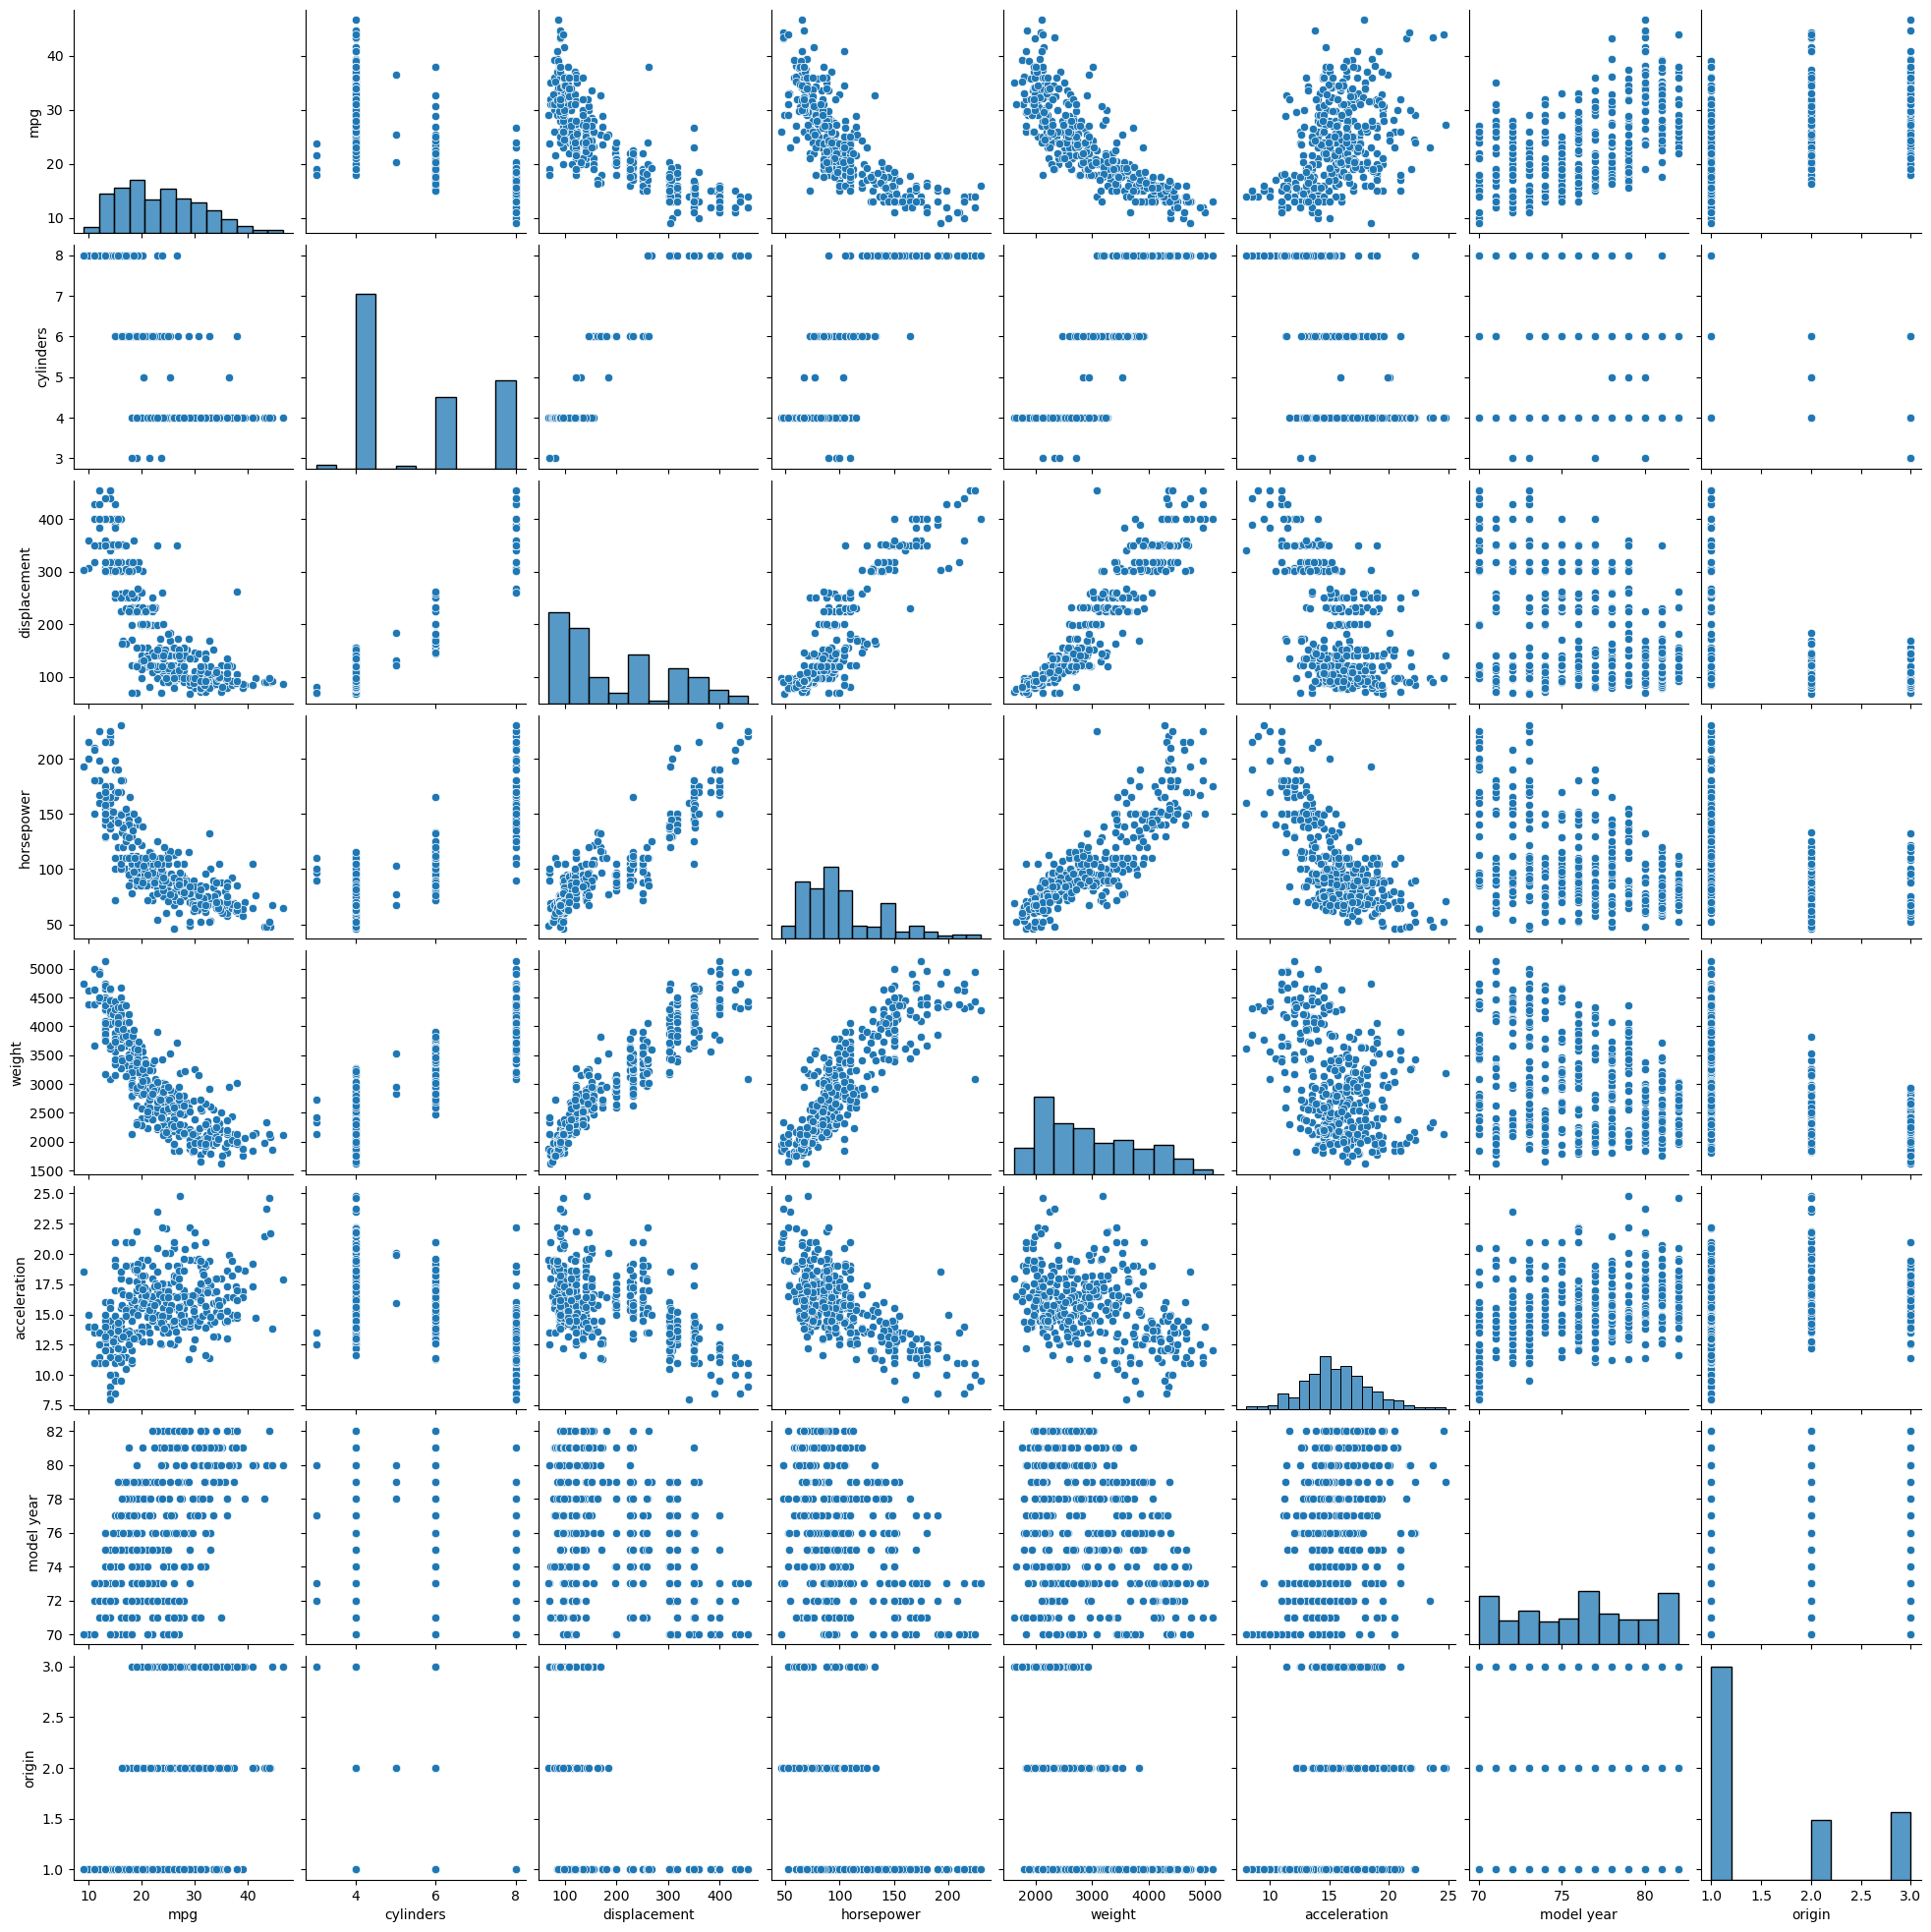

In [16]:
sns.pairplot(df)

In [17]:
corr = df.corr(numeric_only=True)

<AxesSubplot: >

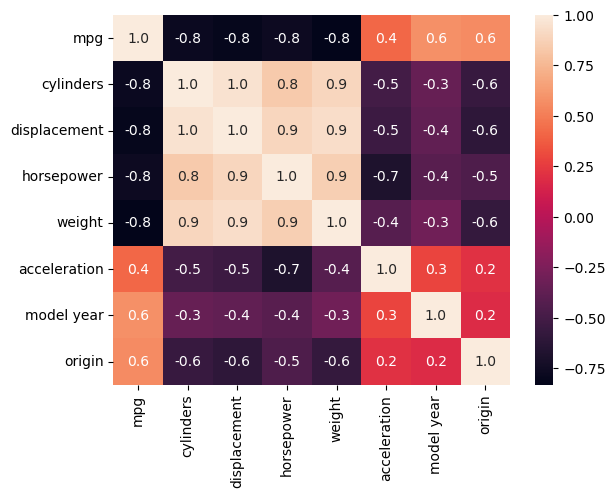

In [18]:
sns.heatmap(corr, annot=True, fmt='.1f')

In [19]:
##Independent features and dependent features
X = df.drop(['mpg', 'car name'], axis=1)
y = df['mpg']

In [20]:
## train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [21]:
##Standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
X_train = scaler.fit_transform(X_train)

In [23]:
X_test = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
##cross validation
from sklearn.model_selection import cross_val_score

In [26]:
lm = LinearRegression()

In [27]:
lm.fit(X_train, y_train)

LinearRegression()

In [28]:
mse = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

In [29]:
np.mean(mse)

-12.674645846659034

In [31]:
##prediction
pred = lm.predict(X_test)

<AxesSubplot: xlabel='mpg', ylabel='Count'>

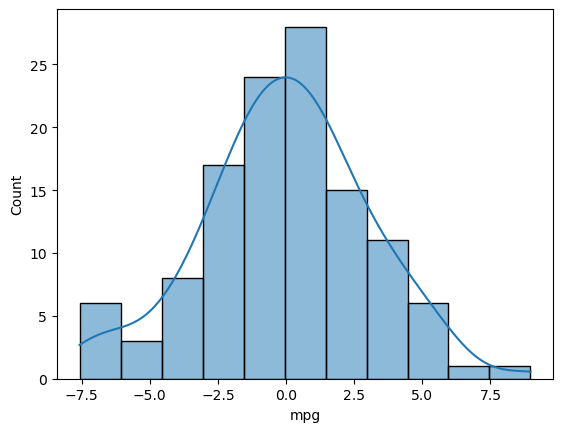

In [32]:
sns.histplot((y_test-pred), kde=True)

In [34]:
from sklearn.metrics import r2_score

In [35]:
score = r2_score(pred, y_test)

In [36]:
score

0.8398188759453222

In [33]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

MAE:  2.368711350854561
MSE:  9.278723220932982
RMSE:  3.046099673505938
